In [52]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
DATA_PREFIX = '/mnt/data/jemmons/nnfc/results/cifar10/'

In [53]:
import matplotlib.pyplot as plt

def make_plots(logfile_csv):
    
    _title_path = os.path.basename(os.path.dirname(logfile_csv))
    
    with open(logfile_csv, 'r') as f:
        lines = f.read().strip().split('\n')
        lines = list(filter(lambda x : '#' not in x, lines))
        lines = lines[1:]
        
        _epochs = []
        _train_top1 = []
        _train_loss = []
        _test_top1 = []
        _test_loss = []
        _checkpoint_files = []
        for line in lines:
            epoch, \
            learning_rate, \
            train_top1, \
            train_loss, \
            test_top1, \
            test_loss, \
            checkpoint_file = line.split(',')

            _epochs.append(int(epoch))
            _train_top1.append(float(train_top1))
            _train_loss.append(float(train_loss))
            _test_top1.append(float(test_top1))
            _test_loss.append(float(test_loss))
            _checkpoint_files.append(checkpoint_file)

        print('top training accuracy: {}'.format(max(_train_top1)))
        print('top validation accuracy: {}'.format(max(_test_top1)))
            
        fig = plt.figure(figsize=(10, 5))
        fig.clear()
        
        ax1 = fig.add_subplot(121)
        ax1.set_ylim([0,1.05])
        ax1.set_title('Training Top-1\n{}'.format(_title_path))
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Accuracy (top-1)')
        ax1.plot(_epochs, _train_top1, color="#000000", ls="-", marker="o")
        ax1.plot(_epochs, _test_top1, color="#008080", ls="-", marker="o")

        ax2 = fig.add_subplot(122)
        ax2.set_ylim([0, 1.05])
        ax2.set_title('Training Loss\n {}'.format(_title_path))
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Loss')
        
        normalized_train_loss = list(map(lambda x: x / max(_train_loss), _train_loss))
        normalized_test_loss = list(map(lambda x: x / max(_test_loss), _test_loss))
        ax2.plot(_epochs, normalized_train_loss, color="#000000", ls="-", marker="o")
        ax2.plot(_epochs, normalized_test_loss, color="#008080", ls="-", marker="o")
        
def summarize_accuracy(filenames, x_labels):
    
    data = []
    for filename in filenames:
        with open(filename, 'r') as f:
            lines = f.read().strip().split('\n')
            lines = list(filter(lambda x : '#' not in x, lines))
            lines = lines[1:]

            _epochs = []
            _train_top1 = []
            _train_loss = []
            _test_top1 = []
            _test_loss = []
            _checkpoint_files = []
            for line in lines:
                epoch, \
                learning_rate, \
                train_top1, \
                train_loss, \
                test_top1, \
                test_loss, \
                checkpoint_file = line.split(',')

                _epochs.append(int(epoch))
                _train_top1.append(float(train_top1))
                _train_loss.append(float(train_loss))
                _test_top1.append(float(test_top1))
                _test_loss.append(float(test_loss))
                _checkpoint_files.append(checkpoint_file)

            data.append({
                'epochs' : _epochs,
                'train_top1' : _train_top1,
                'train_loss' : _train_loss,
                'test_top1' : _test_top1,
                'test_loss' : _test_loss,
                'checkpoint_files' : _checkpoint_files
            })
    
    top_train_acc = []
    top_validation_acc = []
    for d in data:
        #top_train_acc.append(max(d['train_top1']))
        #top_validation_acc.append(max(d['test_top1']))
        top_train_acc.append(d['train_top1'][-1])
        top_validation_acc.append(d['test_top1'][-1])
        
    fig = plt.figure(figsize=(5, 5))
    fig.clear()
        
    ax1 = fig.add_subplot(111)
    ax1.set_ylim([.60,1.05])
    ax1.set_xlim([0, 3500])
    ax1.set_title('Training Top-1\n(cifar10 dataset; resnet18 architecture)')
    ax1.set_xlabel('image_size using JPEG compression (bytes)')
    ax1.set_ylabel('accuracy (top-1)')
    #ax1.set_xscale("log", nonposx='clip')
    ax1.set_xlim(ax1.get_xlim()[::-1])
    l1 = ax1.plot(x_labels, top_train_acc, color="#000000", ls="-", marker="o",label='train_accuracy')
    l2 = ax1.plot(x_labels, top_validation_acc, color="#008080", ls="-", marker="o", label='validation_accuracy')
    for i,j in zip(x_labels,top_validation_acc):
        ax1.annotate(str(round(j,2)),xy=(i+0,j+.01))
    ax1.legend(loc='lower left', shadow=True)

In [54]:
def no_plot_summarize_accuracy(filenames):
    
    data = []
    for filename in filenames:
        with open(filename, 'r') as f:
            lines = f.read().strip().split('\n')
            lines = list(filter(lambda x : '#' not in x, lines))
            lines = lines[1:]

            _epochs = []
            _train_top1 = []
            _train_loss = []
            _test_top1 = []
            _test_loss = []
            _checkpoint_files = []
            for line in lines:
                epoch, \
                learning_rate, \
                train_top1, \
                train_loss, \
                test_top1, \
                test_loss, \
                checkpoint_file = line.split(',')

                _epochs.append(int(epoch))
                _train_top1.append(float(train_top1))
                _train_loss.append(float(train_loss))
                _test_top1.append(float(test_top1))
                _test_loss.append(float(test_loss))
                _checkpoint_files.append(checkpoint_file)

            data.append({
                'epochs' : _epochs,
                'train_top1' : _train_top1,
                'train_loss' : _train_loss,
                'test_top1' : _test_top1,
                'test_loss' : _test_loss,
                'checkpoint_files' : _checkpoint_files
            })
            
    return data

Text(0.1035,3572,'uncompressed input size')

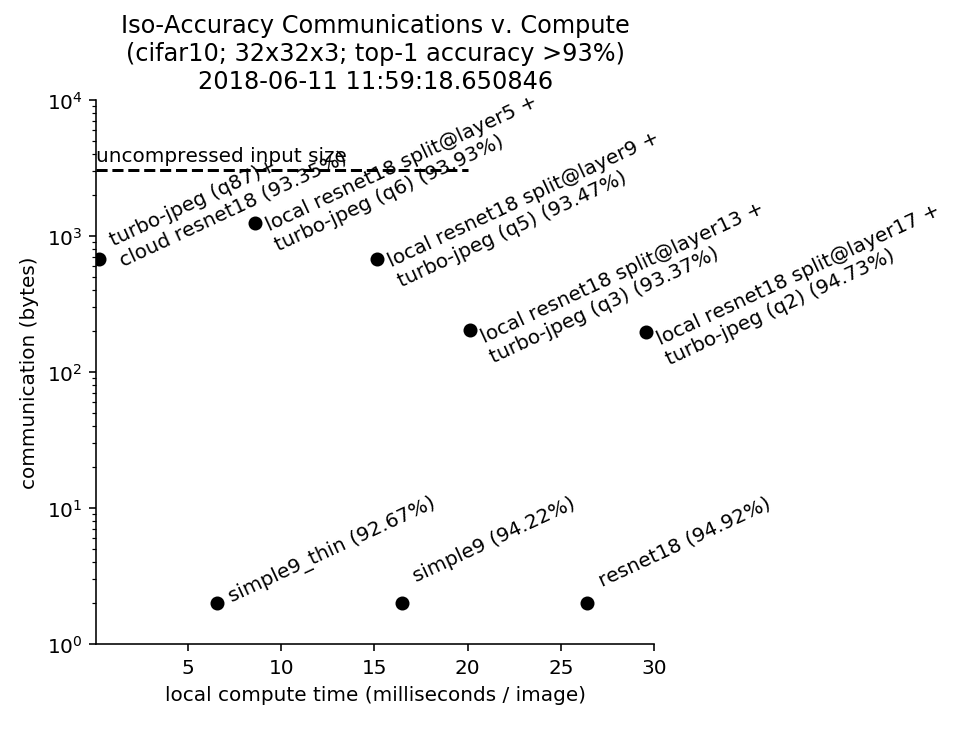

In [161]:
import math 
import glob
import datetime
import json

RESULTS_PATH = '/home/jemmons/projects/nnfc/scratch/cifar10/results'

filenames = sorted(glob.glob(RESULTS_PATH + '/*.json'))

x_compute = []
y_network = []
labels = []
l = {
        'simplenet9_thin' : 'simple9_thin ({}%)', 
        'simplenet9' : 'simple9 ({}%)', 
        'resnet18' : 'resnet18 ({}%)', 
        'mobilenetv2' : 'mobilenetv2 ({}%)',
        'resnet18EH0' : 'local resnet18 split@layer1 +\nturbo-jpeg (q20) ({}%)',
        'resnet18EH1' : 'local resnet18 split@layer5 +\nturbo-jpeg (q6) ({}%)',
        'resnet18EH2' : 'local resnet18 split@layer9 +\nturbo-jpeg (q5) ({}%)',
        'resnet18EH3' : 'local resnet18 split@layer13 +\nturbo-jpeg (q3) ({}%)',
        'resnet18EH4' : 'local resnet18 split@layer17 +\nturbo-jpeg (q2) ({}%)',
        'resnet18JPEG87' : 'turbo-jpeg (q87)+\ncloud resnet18 ({}%)', 
        }

for i, filename in enumerate(filenames):
    with open(filename, 'r') as f:
        data = json.loads(f.read().strip())
        
        x_compute.append(1000 * data['timing']['mean'])
        y_network.append(data['validation_mean_size'])
        try:
            labels.append(l[data['network_name']].format(100*data['validation_top1']))
        except:
            labels.append('')
        
fig = plt.figure(figsize=(5, 5))
fig.clear()

ax1 = fig.add_subplot(111)
ax1.set_xlim([10**-1, 30])
ax1.set_ylim([1,10**4])
ax1.set_title('Iso-Accuracy Communications v. Compute\n(cifar10; 32x32x3; top-1 accuracy >93%)\n{}'.format(datetime.datetime.now()
))
ax1.set_ylabel('communication (bytes)')
ax1.set_xlabel('local compute time (milliseconds / image)')
#ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
l1 = ax1.plot(x_compute, y_network, color="#000000", ls='', marker="o")

for l,i,j in zip(labels, x_compute, y_network):
    ax1.annotate(l, xy=(i,j), rotation=25, xytext=(8,95), textcoords='offset pixels')
    
ax1.plot([0.1,20], [32*32*3, 32*32*3], color="#000000", ls='--')
ax1.annotate('uncompressed input size',xy=(.1035,32*32*3+500))

Text(0.1035,3572,'uncompressed input size')

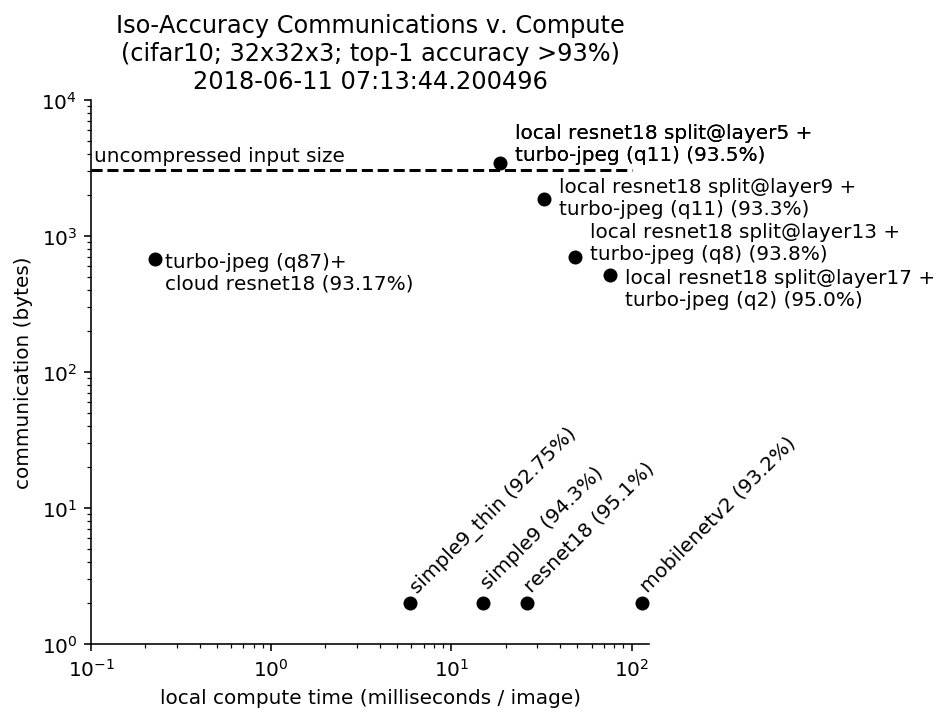

In [55]:
import math 
import datetime

# files = ['simplenet9', 'resnet18', 'mobilenetv2.1000']
# paths = list(map(lambda x : os.path.join(DATA_PREFIX, x, 'training_log.csv'), files))
# data = no_plot_summarize_accuracy(paths)

x_compute = list(map(lambda x: x, [14.9, 26.2, 113.9, 0.227, 76.0, 48.3, 32.6, 28.15, 5.9]))
y_network = [2.0, 2.0, 2.0, 679.56, 519.201, 698.2959, 1876.9033, 1240.7566, 2.0]
#label = ['simple9 (94.3%)', 'resnet18 (95.1%)', 'mobilenetv2 (93.2%)']

fig = plt.figure(figsize=(5, 5))
fig.clear()

ax1 = fig.add_subplot(111)
ax1.set_xlim([10**-1, 125])
ax1.set_ylim([1,10**4])
ax1.set_title('Iso-Accuracy Communications v. Compute\n(cifar10; 32x32x3; top-1 accuracy >93%)\n{}'.format(datetime.datetime.now()
))
ax1.set_ylabel('communication (bytes)')
ax1.set_xlabel('local compute time (milliseconds / image)')
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
l1 = ax1.plot(x_compute, y_network, color="#000000", ls='', marker="o")

# for l,i,j in zip(label,x_compute,y_network):
#     ax1.annotate('  '+l, xy=(i,j), rotation=45, xytext=(-5,150), textcoords='offset pixels')

ax1.annotate('local resnet18 split@layer5 +\nturbo-jpeg (q6) (93.9%)', xy=(28.15, 1240.7566), rotation=0, xytext=(15,3), textcoords='offset pixels')
ax1.annotate('local resnet18 split@layer9 +\nturbo-jpeg (q4) (93.3%)', xy=(32.6, 1876.9033), rotation=0, xytext=(15,-15), textcoords='offset pixels')
ax1.annotate('local resnet18 split@layer13 +\nturbo-jpeg (q8) (93.3%)', xy=(35.3, 359.2915), rotation=0, xytext=(15,0), textcoords='offset pixels')
#ax1.annotate('local resnet18 split@layer17 +\nturbo-jpeg (q2) (95.0%)', xy=(76.0, 519.201), rotation=0, xytext=(15,-30), textcoords='offset pixels')

#ax1.annotate('turbo-jpeg (q95) +\ncloud resnet18 (94.1%)', xy=(2.5, 679.56), rotation=0, xytext=(10,15), textcoords='offset pixels')
#ax1.annotate('turbo-jpeg (q90)+\ncloud resnet18 (93.4%)', xy=(2.5, 679.56), rotation=0, xytext=(10,-30), textcoords='offset pixels')
ax1.annotate('turbo-jpeg (q87)+\ncloud resnet18 (93.17%)', xy=(0.227, 679.56), rotation=0, xytext=(10,-30), textcoords='offset pixels')

ax1.annotate('simple9_thin (92.75%)', xy=(6.01, 2.0), rotation=45, xytext=(-5,165), textcoords='offset pixels')
ax1.annotate('simple9 (94.3%)', xy=(14.9, 2.0), rotation=45, xytext=(-5,125), textcoords='offset pixels')
ax1.annotate('resnet18 (95.1%)', xy=(26.2, 2.0), rotation=45, xytext=(-6,130), textcoords='offset pixels')
ax1.annotate('mobilenetv2 (93.2%)', xy=(113.9, 2.0), rotation=45, xytext=(-5,155), textcoords='offset pixels')
    
ax1.plot([0.1,100], [32*32*3, 32*32*3], color="#000000", ls='--')
ax1.annotate('uncompressed input size',xy=(.1035,32*32*3+500))

top training accuracy: 1.0
top validation accuracy: 0.9495


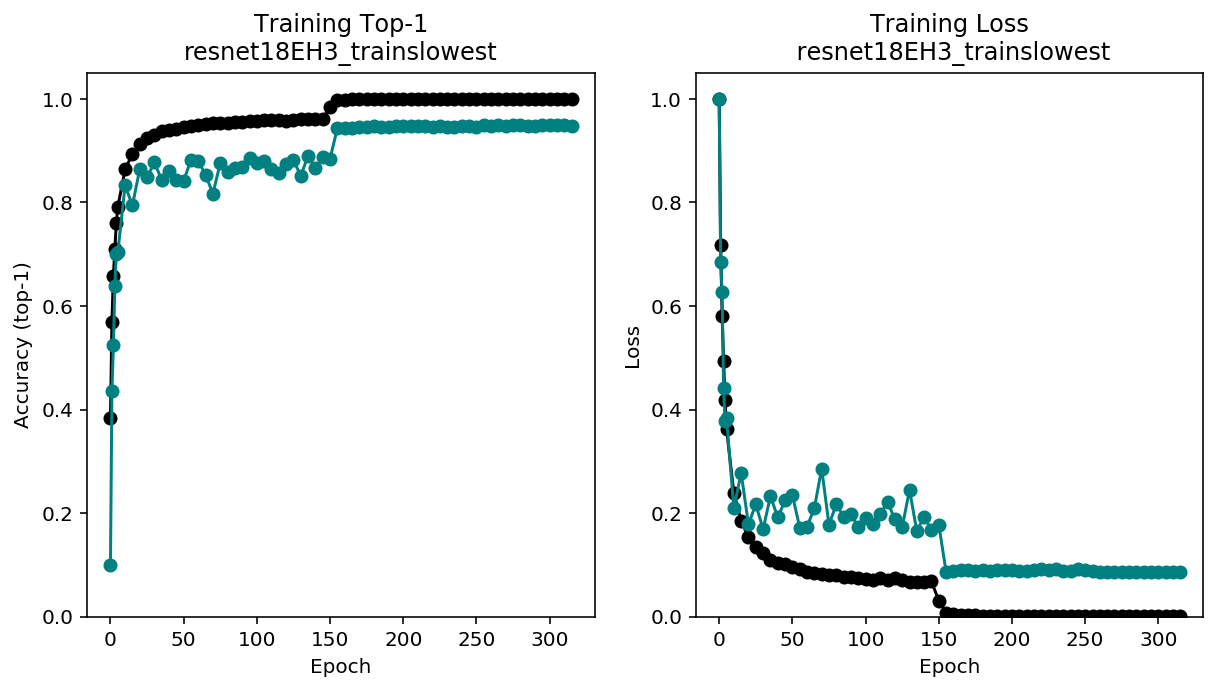

In [65]:
results_dir = 'resnet18EH3_trainslowest'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 0.99998
top validation accuracy: 0.9459


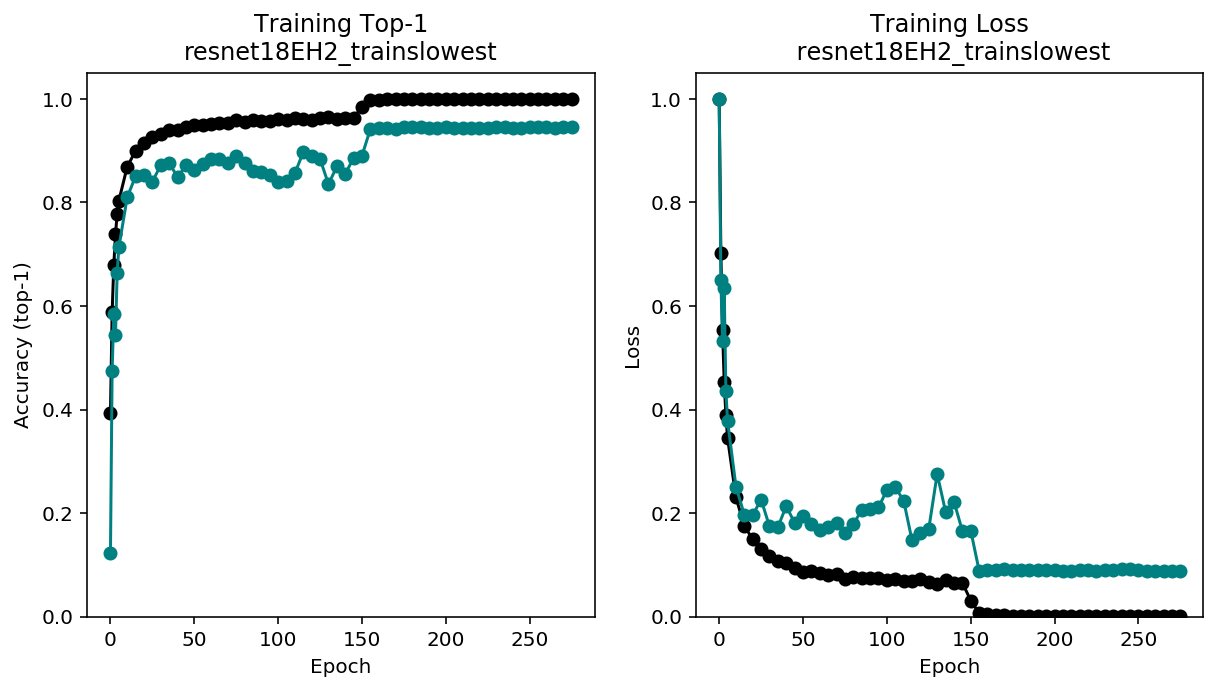

In [66]:
results_dir = 'resnet18EH2_trainslowest'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 1.0
top validation accuracy: 0.9494


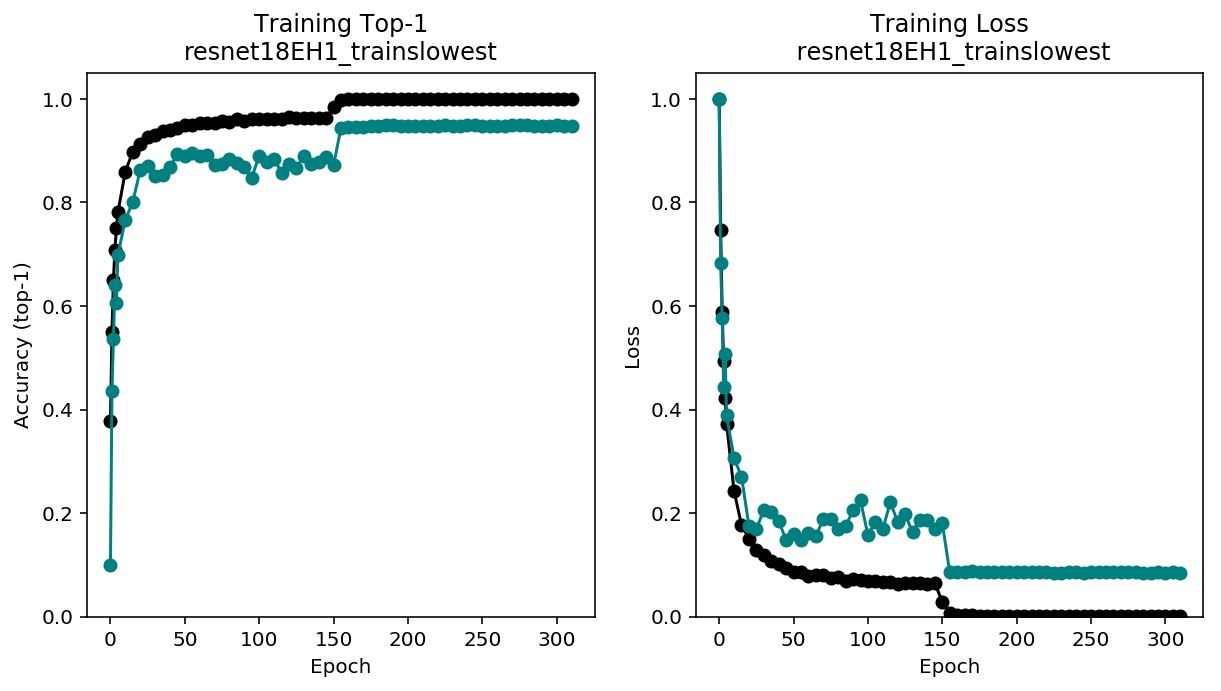

In [67]:
results_dir = 'resnet18EH1_trainslowest'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 1.0
top validation accuracy: 0.9347


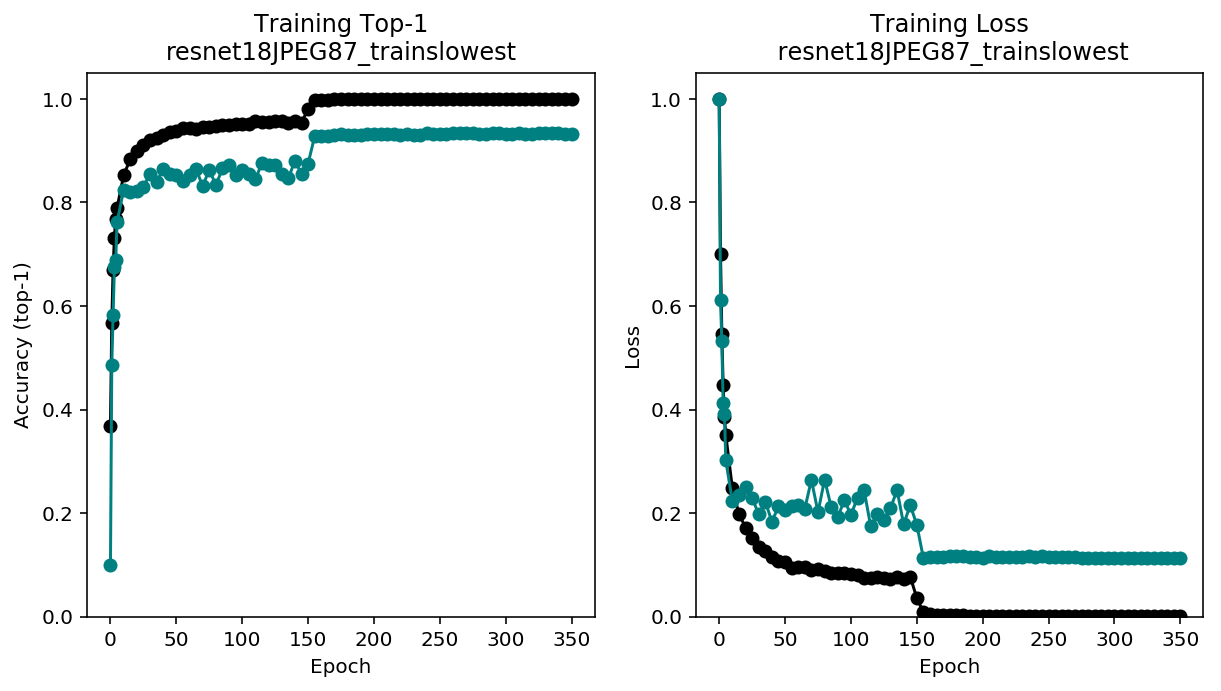

In [59]:
results_dir = 'resnet18JPEG87_trainslowest'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 1.0
top validation accuracy: 0.9375


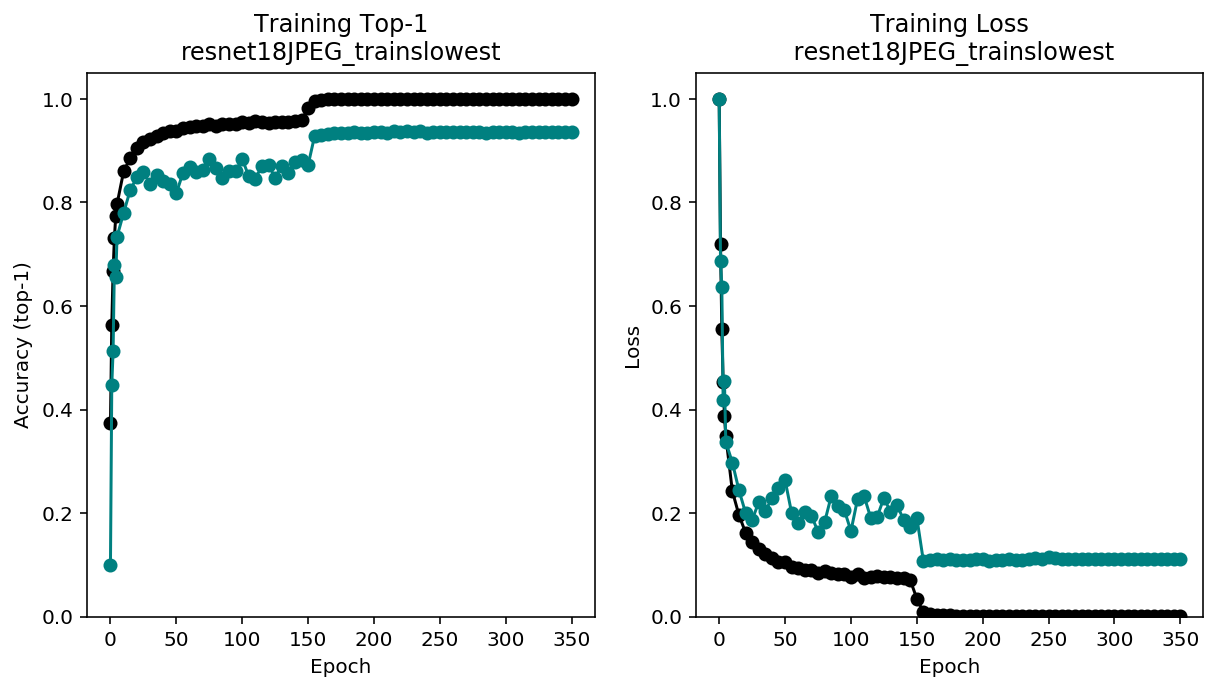

In [60]:
results_dir = 'resnet18JPEG_trainslowest'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 1.0
top validation accuracy: 0.95


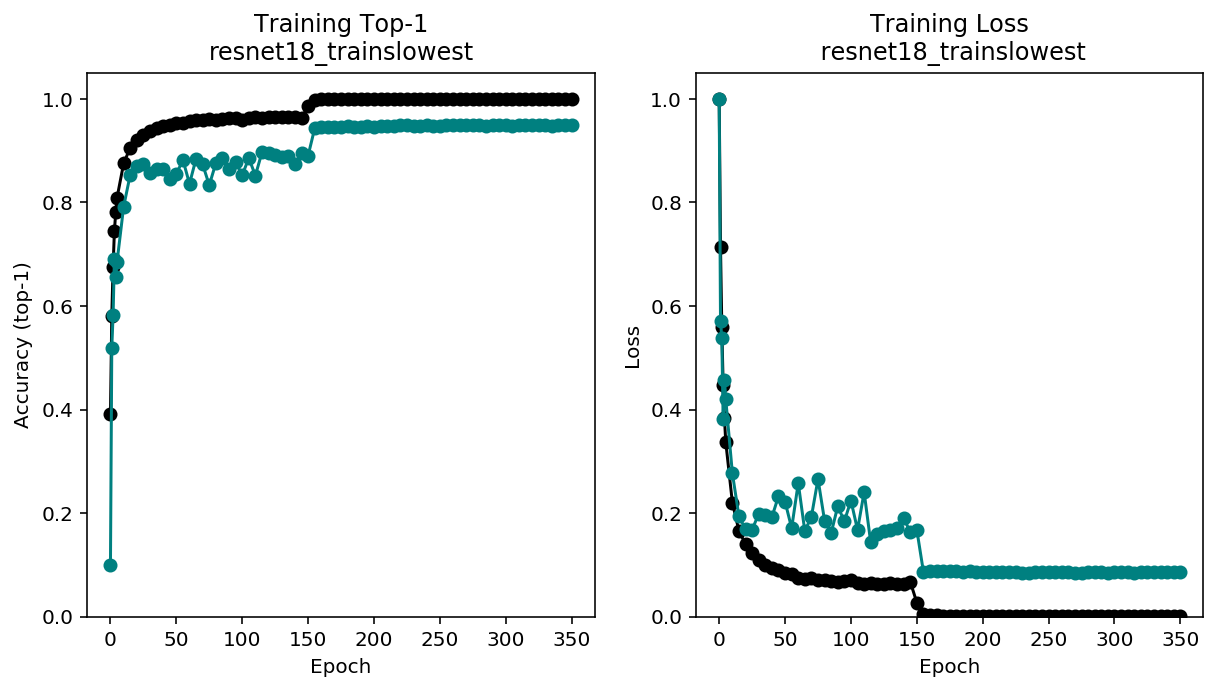

In [61]:
results_dir = 'resnet18_trainslowest'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 0.99986
top validation accuracy: 0.9173


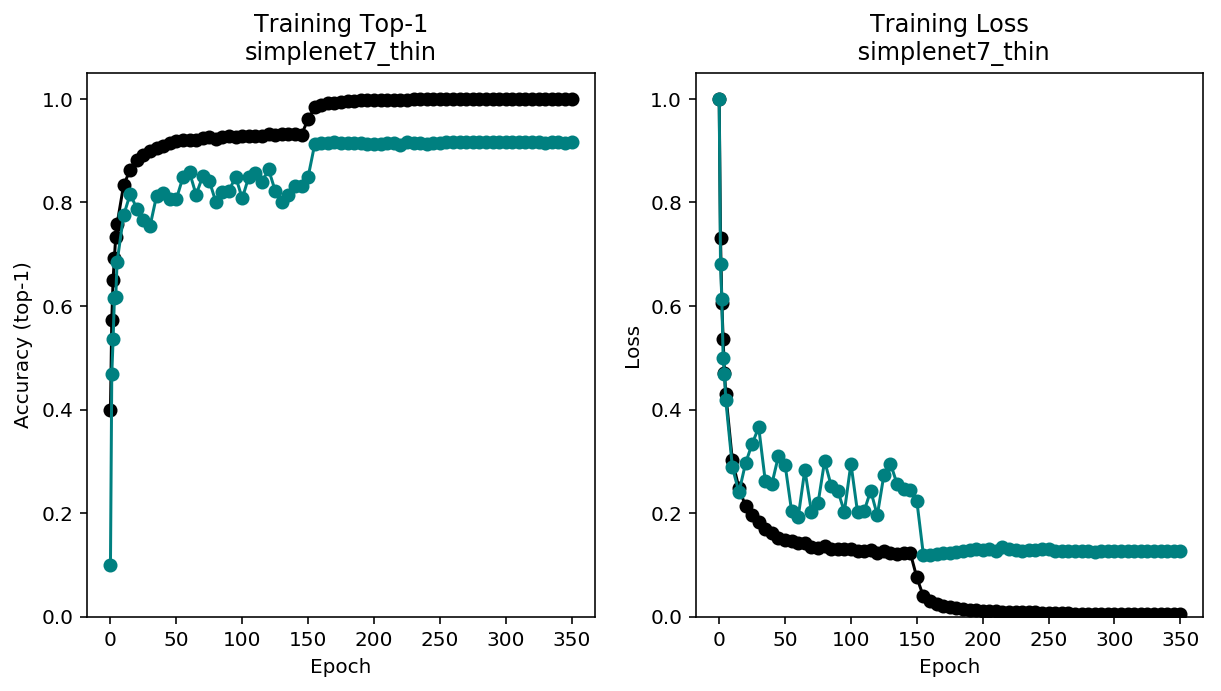

In [28]:
results_dir = 'simplenet7_thin'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 0.99984
top validation accuracy: 0.9212


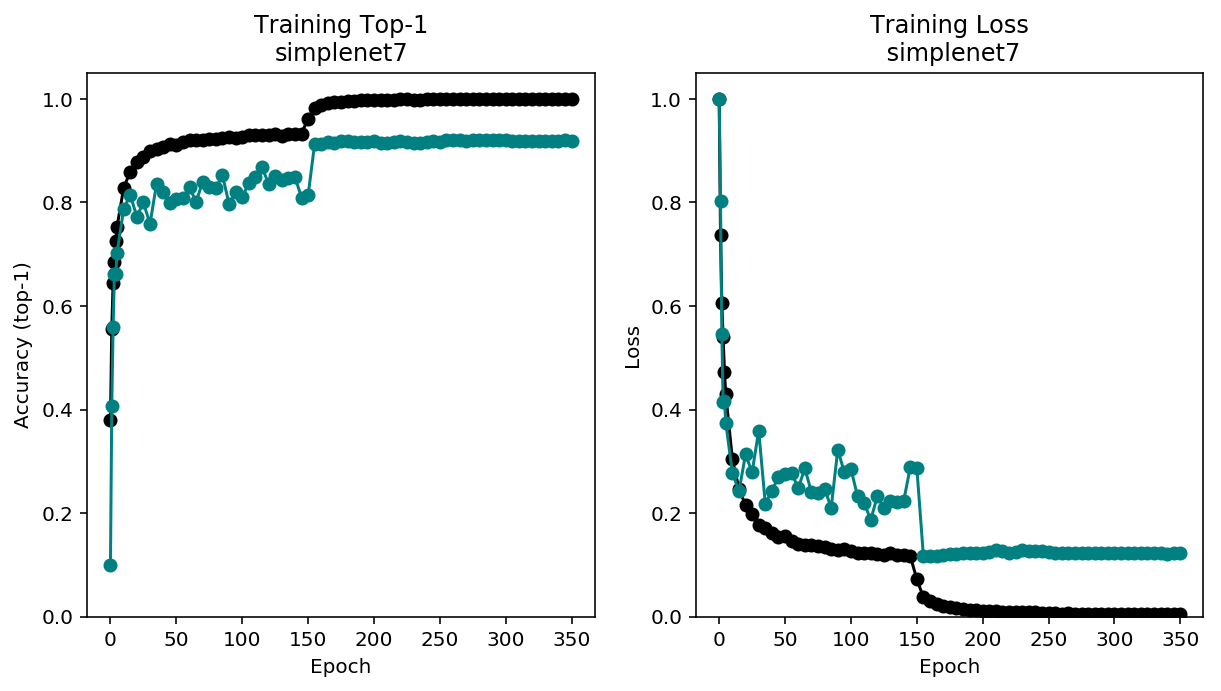

In [32]:
results_dir = 'simplenet7'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 0.90656
top validation accuracy: 0.8418


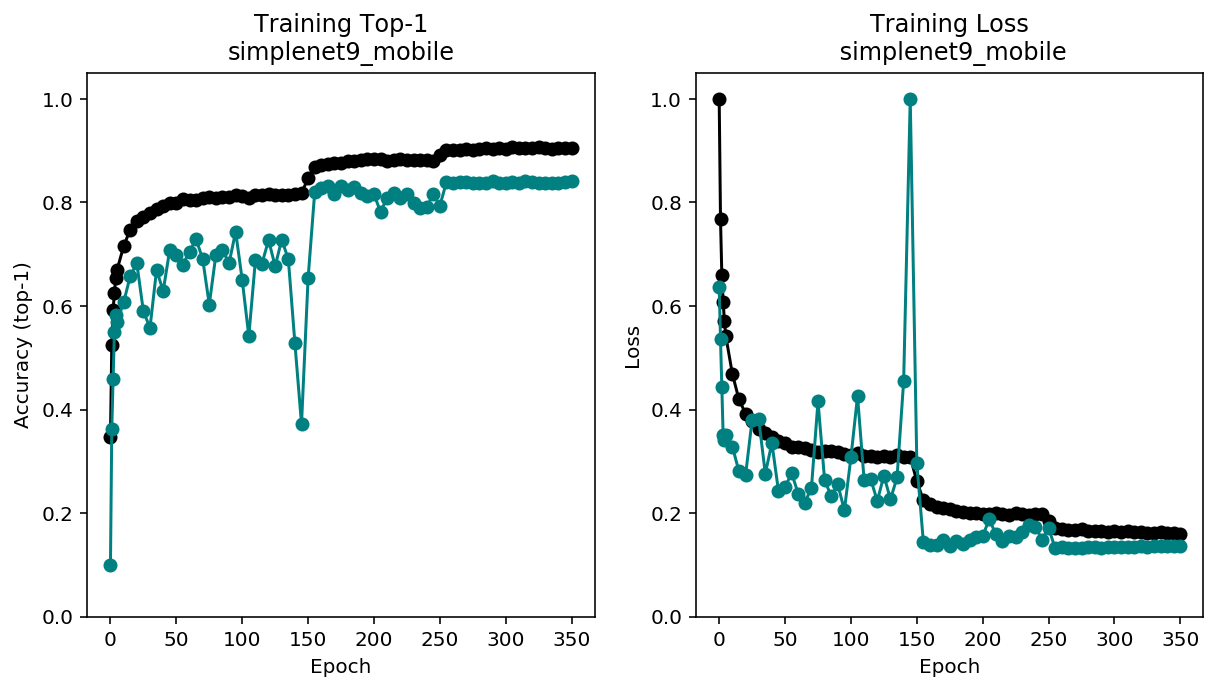

In [30]:
results_dir = 'simplenet9_mobile'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 0.99994
top validation accuracy: 0.9275


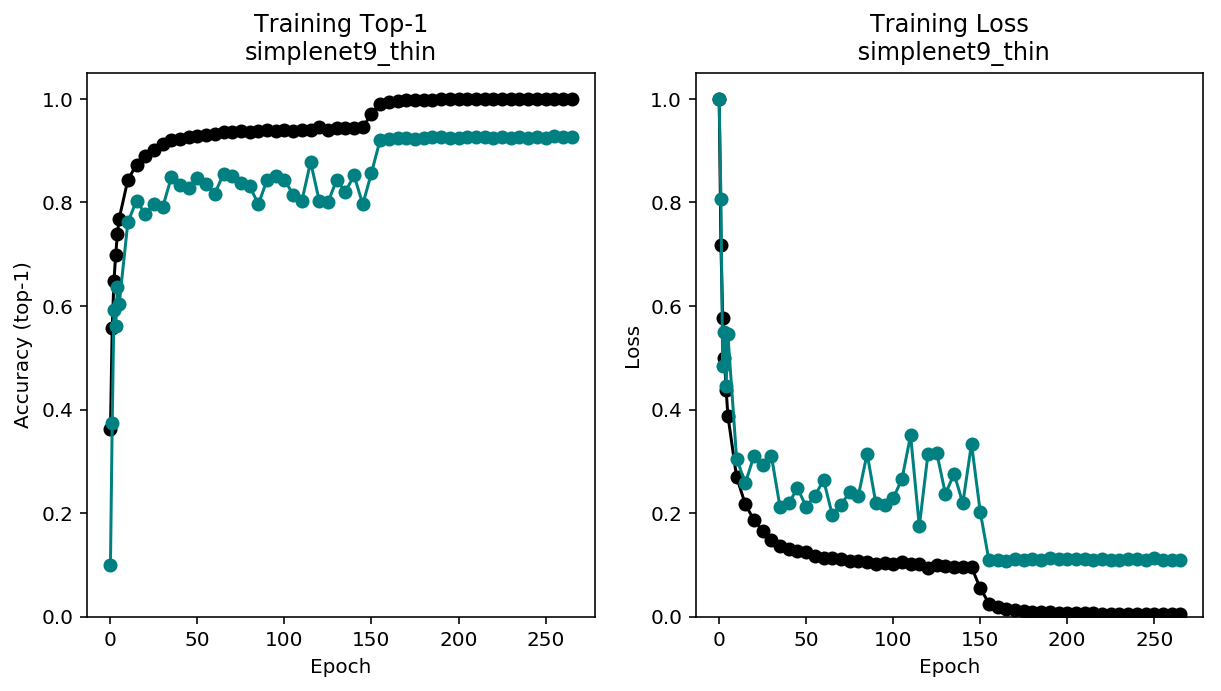

In [31]:
results_dir = 'simplenet9_thin'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 1.0
top validation accuracy: 0.9416


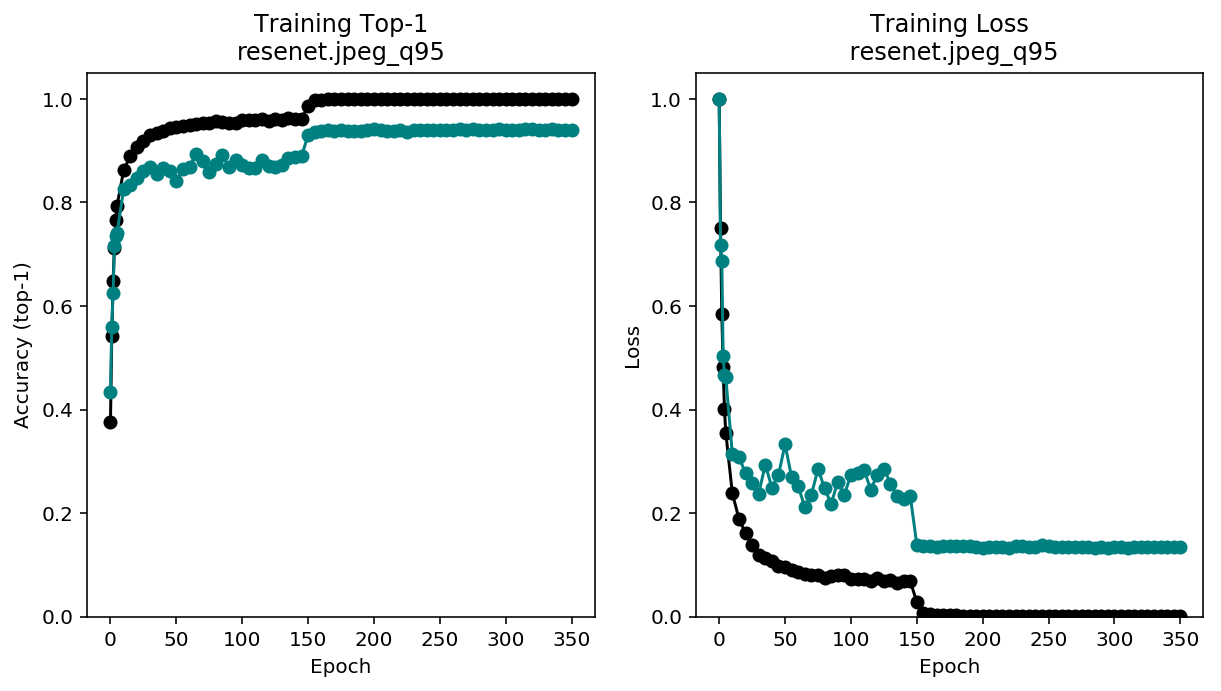

In [7]:
results_dir = 'resenet.jpeg_q95'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 1.0
top validation accuracy: 0.925


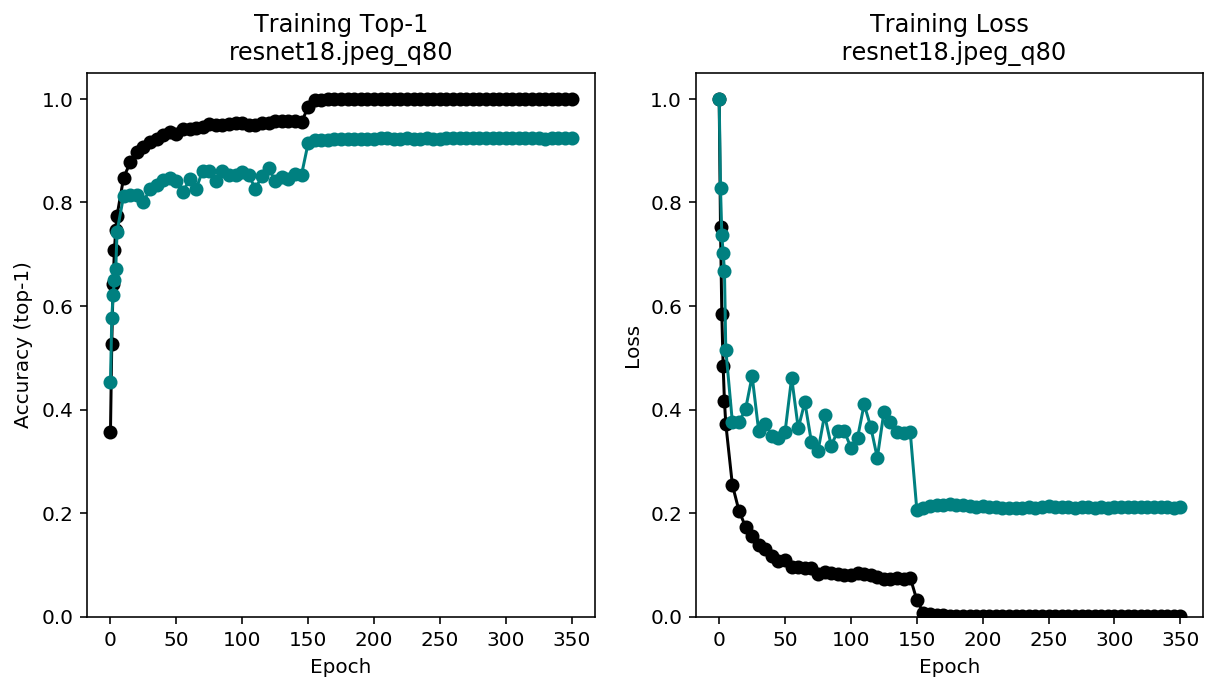

In [171]:
results_dir = 'resnet18.jpeg_q80'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 1.0
top validation accuracy: 0.9075


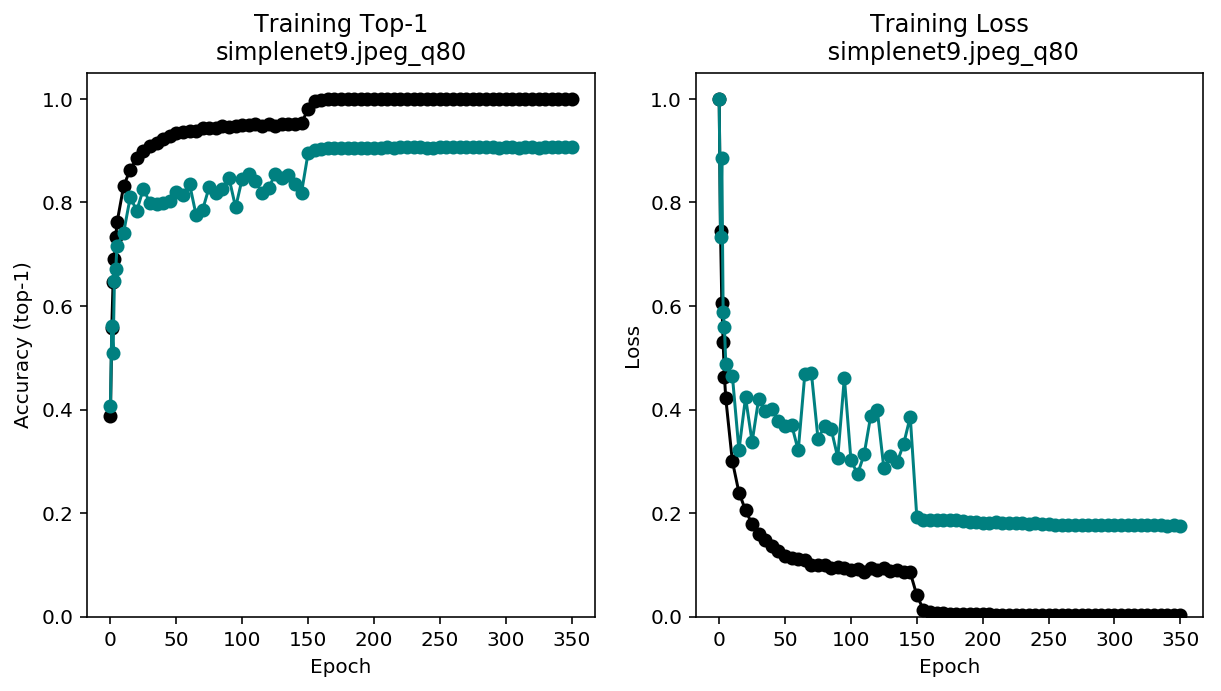

In [162]:
results_dir = 'simplenet9.jpeg_q80'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 1.0
top validation accuracy: 0.9348


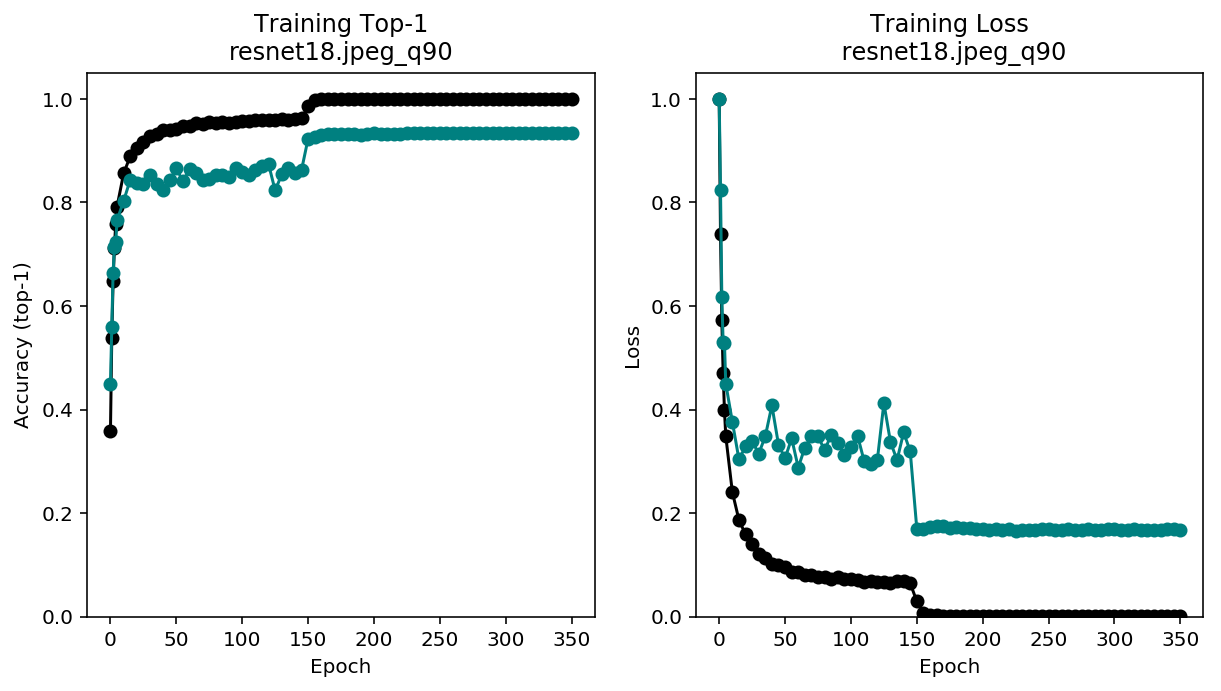

In [163]:
results_dir = 'resnet18.jpeg_q90'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 1.0
top validation accuracy: 0.9232


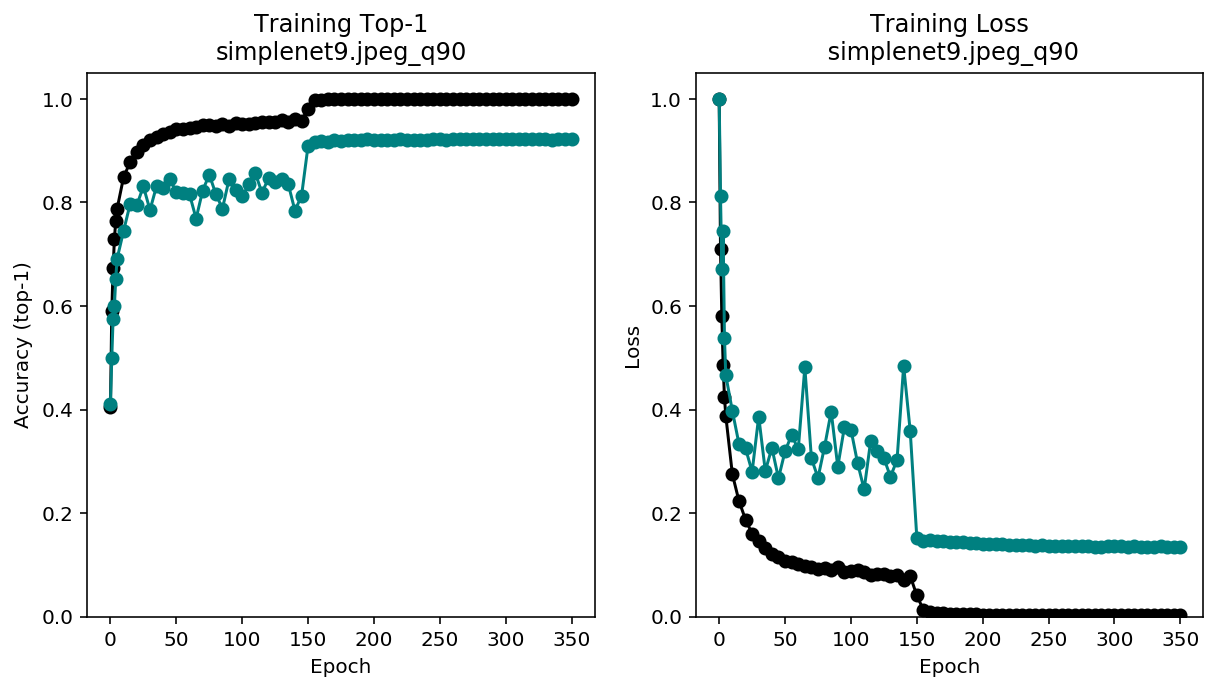

In [164]:
results_dir = 'simplenet9.jpeg_q90'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 0.99962
top validation accuracy: 0.9321


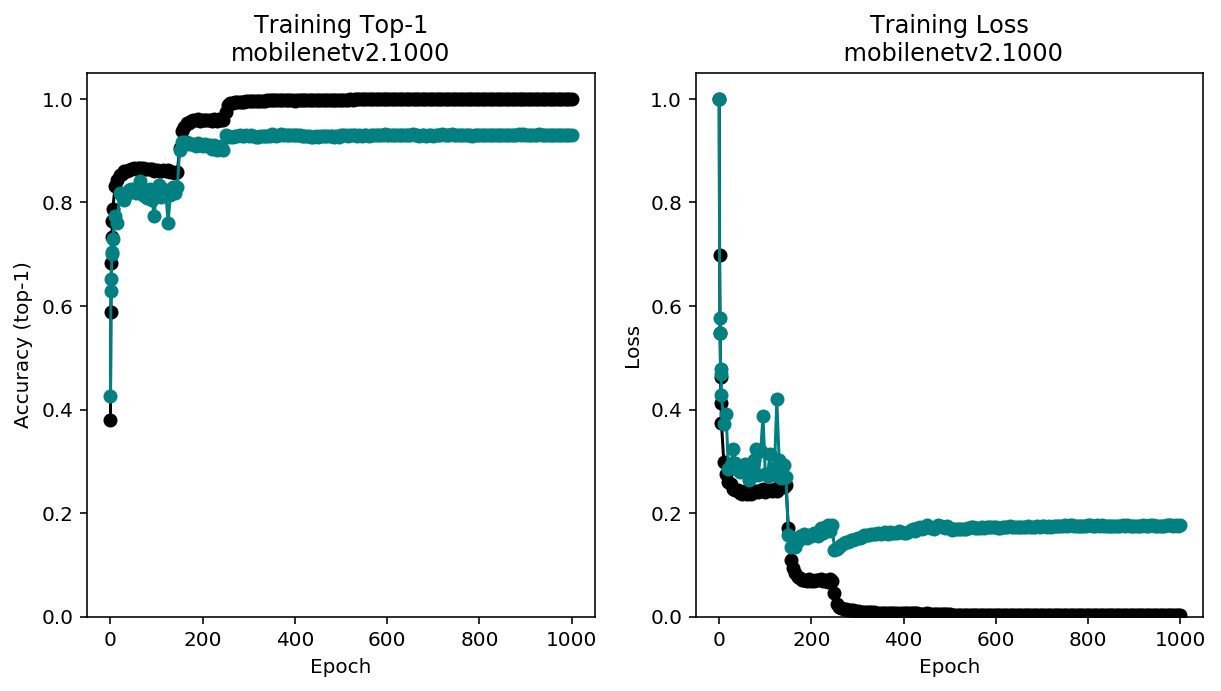

In [142]:
results_dir = 'mobilenetv2.1000'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 0.99998
top validation accuracy: 0.9237


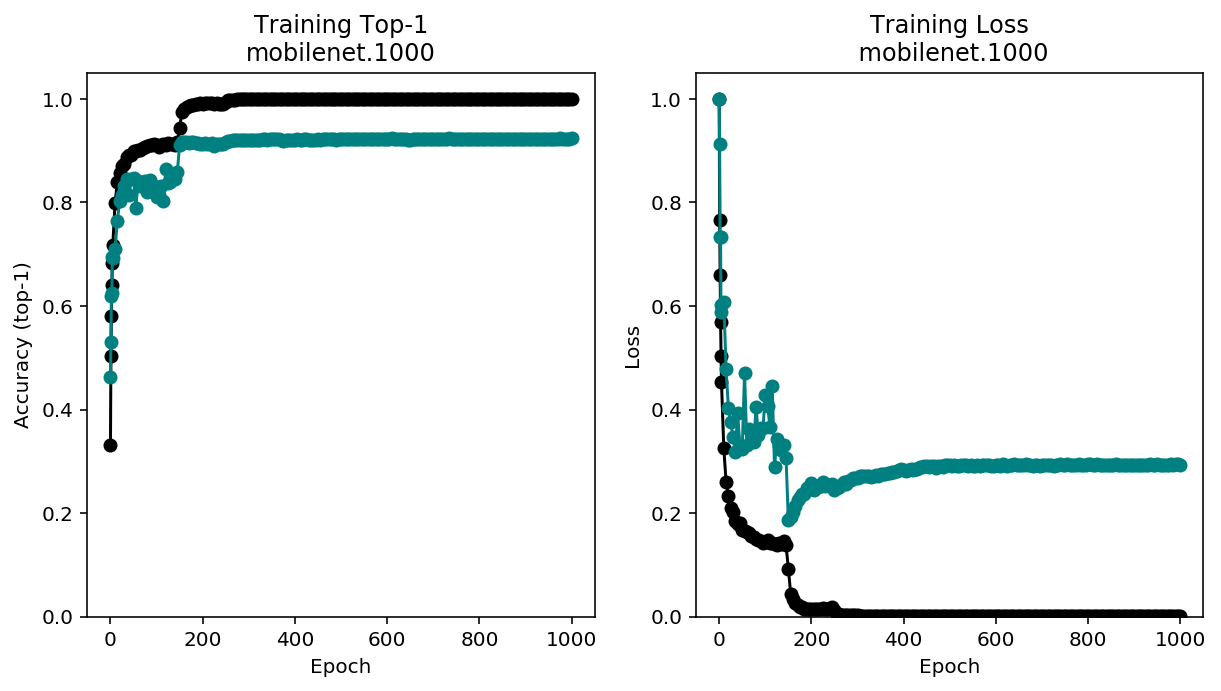

In [9]:
results_dir = 'mobilenet.1000'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 0.99996
top validation accuracy: 0.9226


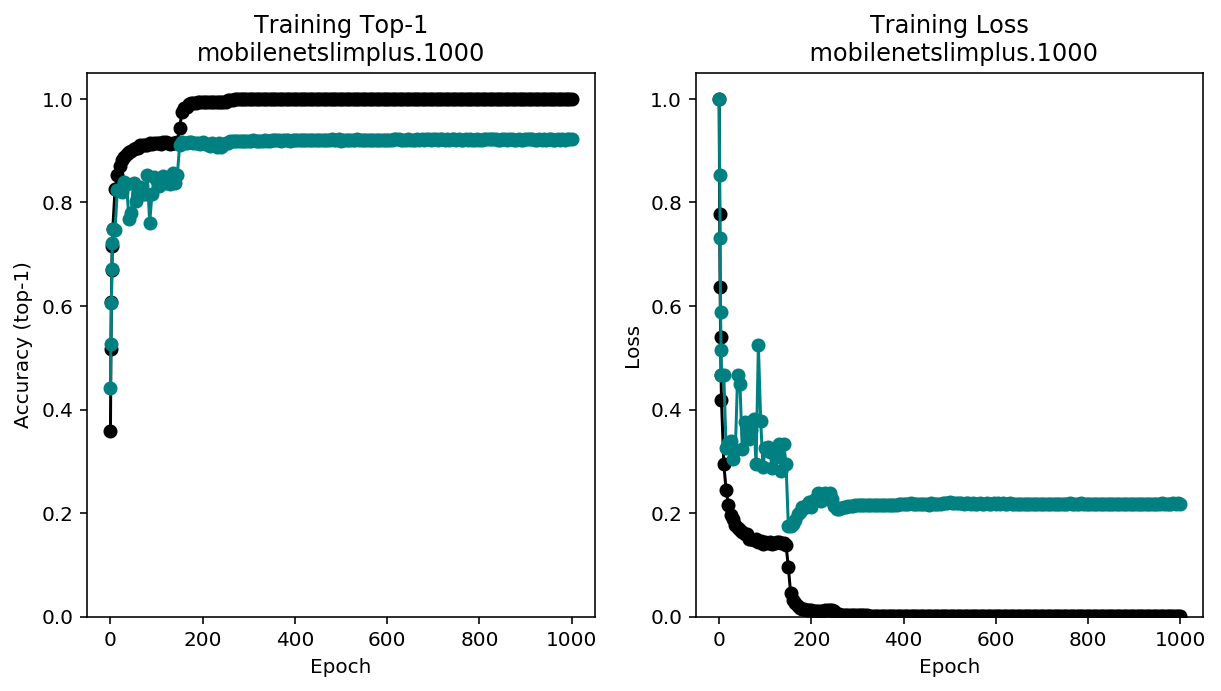

In [11]:
results_dir = 'mobilenetslimplus.1000'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 0.9999
top validation accuracy: 0.9163


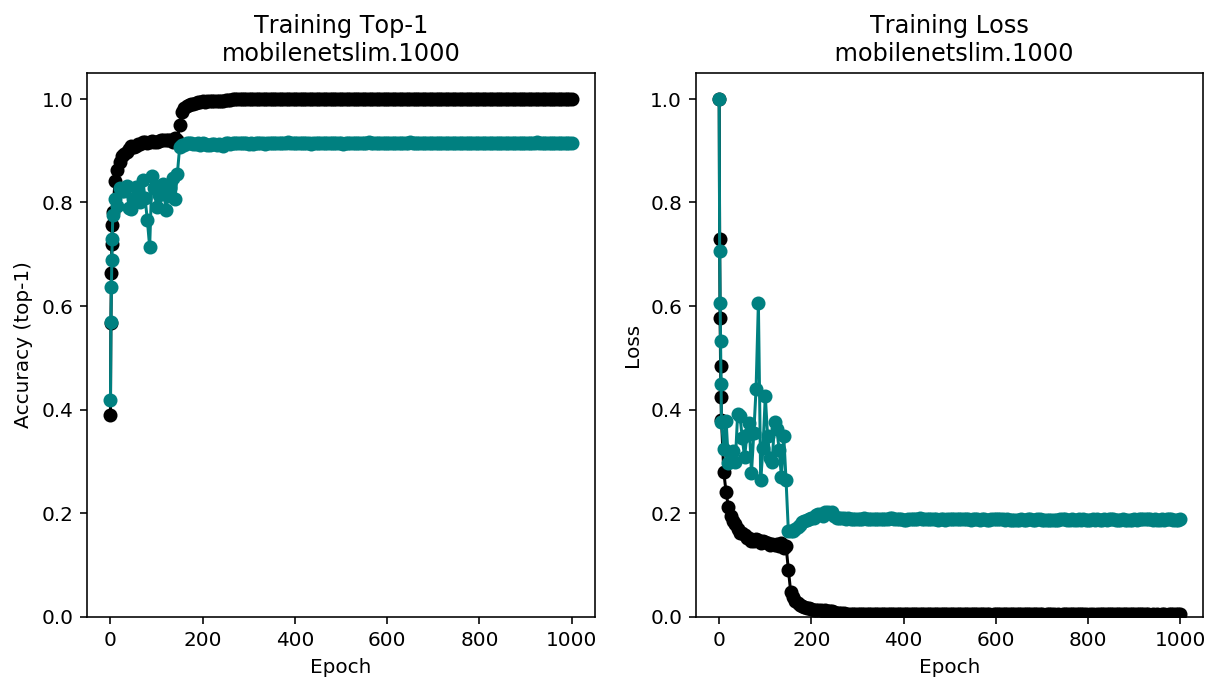

In [12]:
results_dir = 'mobilenetslim.1000'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 1.0
top validation accuracy: 0.9512


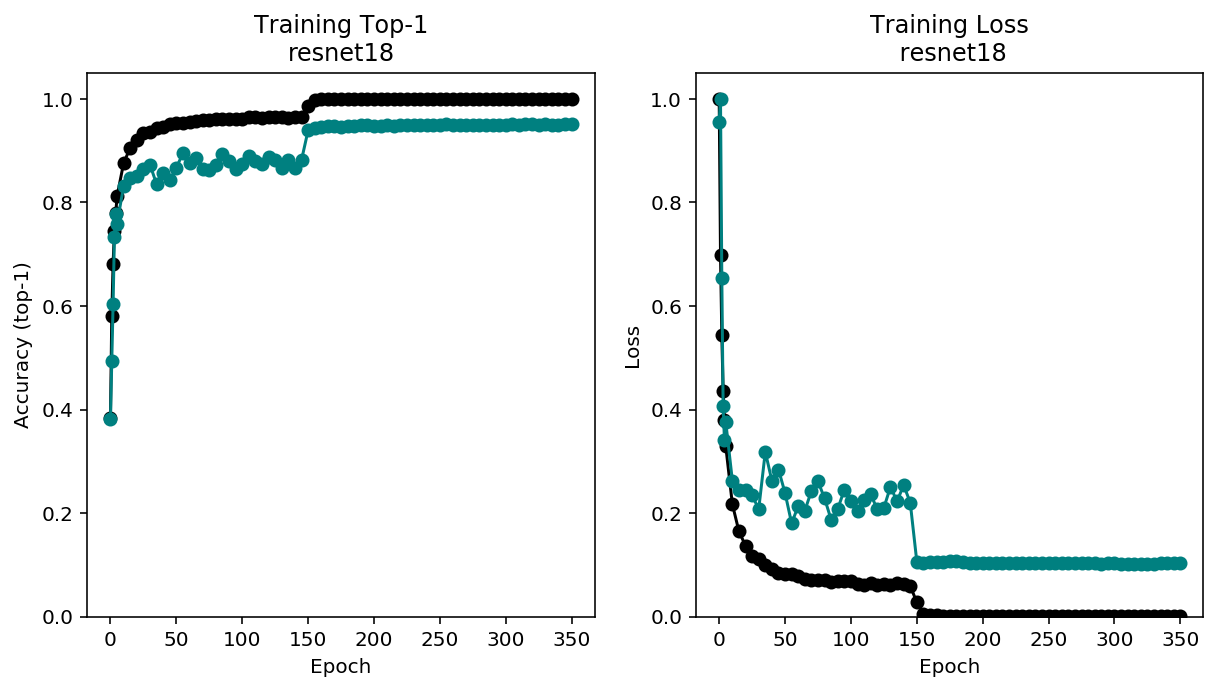

In [15]:
results_dir = 'resnet18'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 1.0
top validation accuracy: 0.9431


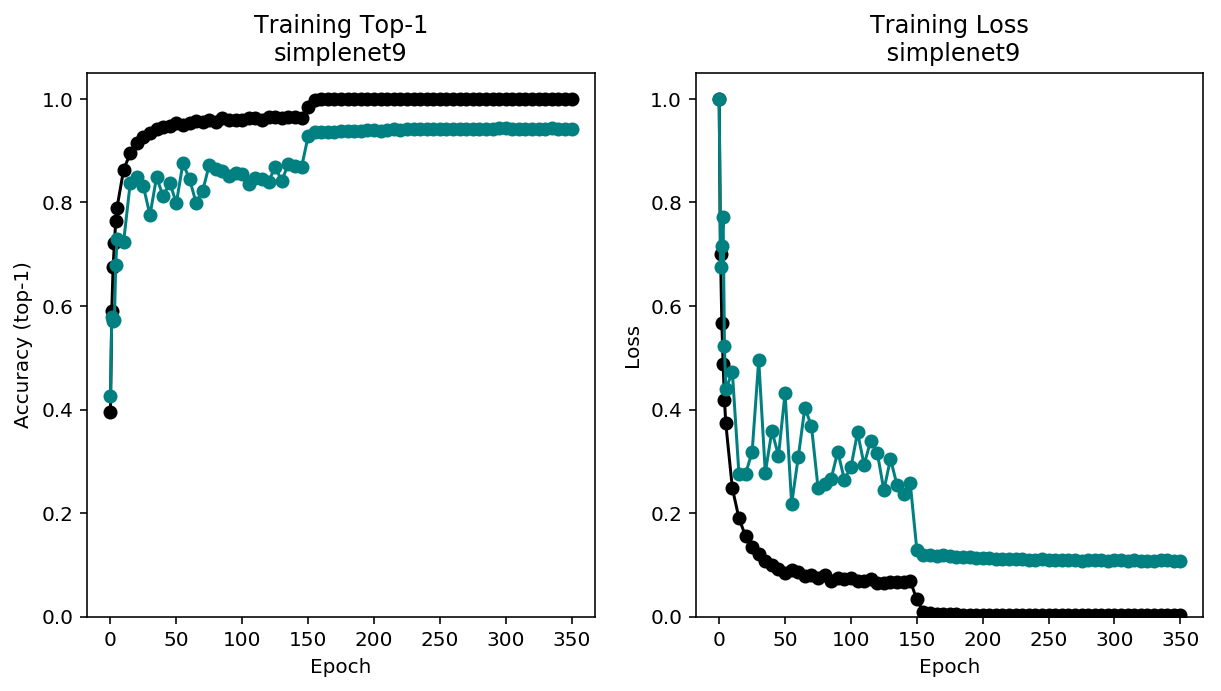

In [17]:
results_dir = 'simplenet9'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)

top training accuracy: 0.7724
top validation accuracy: 0.7686


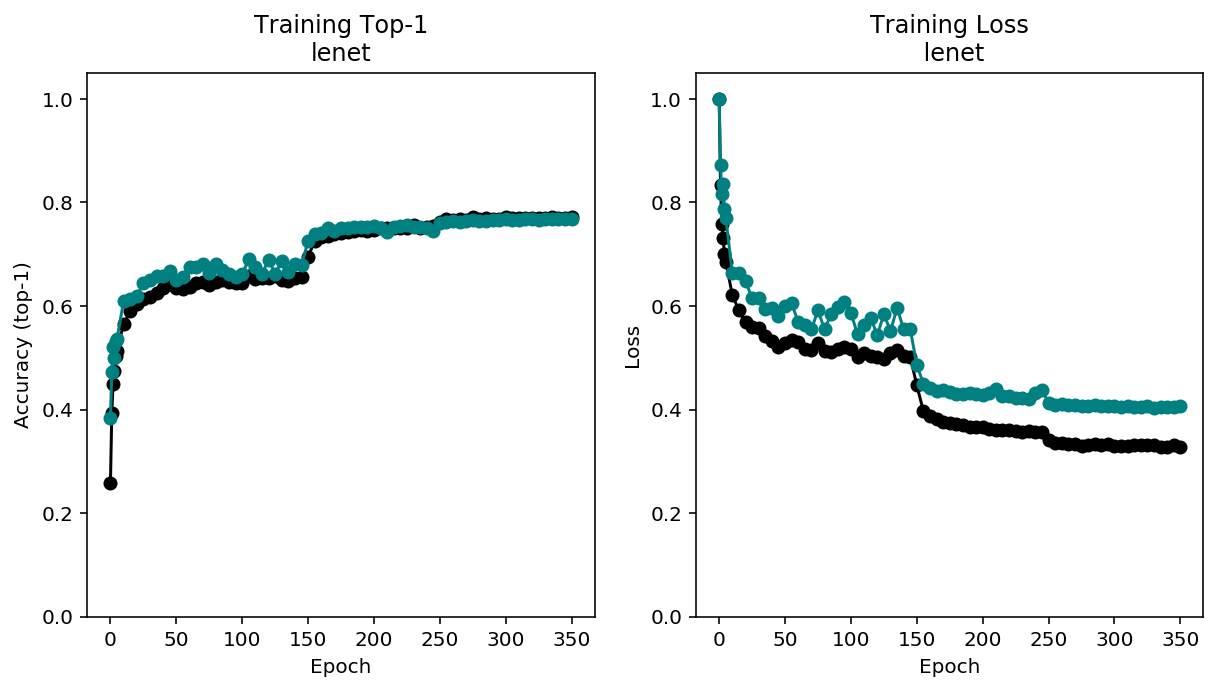

In [18]:
results_dir = 'lenet'
path = os.path.join(DATA_PREFIX, results_dir, 'training_log.csv')
make_plots(path)